## Hospital readmissions data analysis and recommendations for reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise overview

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_read_df

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013
5,WESTERN MISSOURI MEDICAL CENTER,260097,MO,READM-30-HIP-KNEE-HRRP,141,NaN,1.5189,8.1,5.3,19.0,07/01/2010,06/30/2013
6,SAINT AGNES HOSPITAL,210011,MD,READM-30-HIP-KNEE-HRRP,390,NaN,1.5079,7.8,5.2,38.0,07/01/2010,06/30/2013
7,MERCY HOSPITAL JEFFERSON,260023,MO,READM-30-HIP-KNEE-HRRP,178,NaN,1.5019,9.2,6.1,24.0,07/01/2010,06/30/2013
8,ONSLOW MEMORIAL HOSPITAL,340042,NC,READM-30-HIP-KNEE-HRRP,98,NaN,1.4953,7.9,5.3,15.0,07/01/2010,06/30/2013
9,FAUQUIER HOSPITAL,490023,VA,READM-30-HIP-KNEE-HRRP,256,NaN,1.4844,7.4,5.0,26.0,07/01/2010,06/30/2013


****
## Preliminary analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[(hospital_read_df['Number of Discharges'] != 'Not Available')]
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort('Number of Discharges')
clean_hospital_read_df

/Users/vingadgil/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/vingadgil/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15625,FAIRVIEW DEVELOPMENTAL CENTER,50548,CA,READM-30-HF-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15642,WAGONER COMMUNITY HOSPITAL,370166,OK,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15648,ST LUKE'S HOSPITAL AT THE VINTAGE,670075,TX,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15652,SOUTH TEXAS SURGICAL HOSPITAL,670061,TX,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15396,GEORGE L MEE MEMORIAL HOSPITAL,50189,CA,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


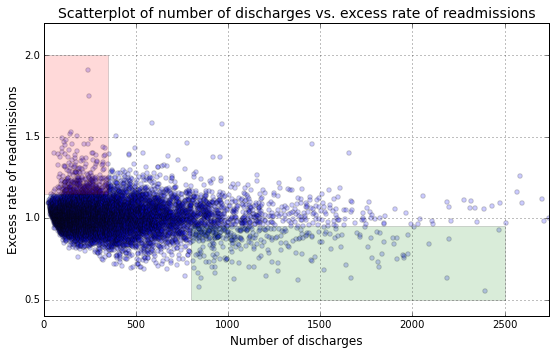

In [6]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary report

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****

## Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [4]:
import seaborn as sns
import numpy as np
import scipy
import math
%matplotlib inline

In [5]:
df = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] != 0].dropna(subset=['Excess Readmission Ratio'])

In [6]:
df

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013
1602,TENNOVA HEALTHCARE-JEFFERSON MEMORIAL HOSPITAL,440056,TN,READM-30-AMI-HRRP,31,NaN,1.0992,24.2,22.1,13.0,07/01/2010,06/30/2013
2048,FORT MADISON COMMUNITY HOSPITAL,160122,IA,READM-30-AMI-HRRP,33,NaN,1.0847,22.6,20.9,12.0,07/01/2010,06/30/2013
2441,ISLAND HOSPITAL,500007,WA,READM-30-AMI-HRRP,34,NaN,1.0738,20.8,19.3,11.0,07/01/2010,06/30/2013
2512,NORTH CENTRAL BRONX HOSPITAL,330385,NY,READM-30-HF-HRRP,34,NaN,1.0720,23.3,21.8,12.0,07/01/2010,06/30/2013
2825,KAISER FOUNDATION HOSPITAL FONTANA,50140,CA,READM-30-PN-HRRP,34,NaN,1.0651,20.7,19.4,11.0,07/01/2010,06/30/2013


## Do you agree with the above analysis and recommendations? Why or why not?


I find it difficult to agree with the recommendations above as they are not based on any real statistical analysis.

The analysis assumes that there are significant differences between the two groups (1.Hopitals with discharges <= 100 and 2. Hopitals with discharges > 1000) however no hypothesis test is ever done to analyse if the observed differences between the two groups are statistically significant or not. Furthermore, the difference in mean excess readmission rate is very small. Therefore, I can't agree with the analysis above.

### B. Statistical Analysis.

We need to conduct Hypothesis test to check if there is a significant difference in both group. We need first Null Hypothesis and Alternative Hypothesis.

Null Hypothesis - H0- That there is no difference in the mean Excess Readmission Ratio in hospitals with discharges <=100 and hospitals with discharges > 1000

Alternative Hypothesis - H1 - That there is a significant difference in the mean Excess Readmission Ratio in hospitals with discharges <=100 and hospitals with discharges > 1000

In [7]:
# Hypothesis test 
# Splitting the hospitals into two groups
# Small hospitals first
clean_hospital_read_df = hospital_read_df[(hospital_read_df['Number of Discharges'] != 'Not Available')]
small_hos = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'].astype(int) <= 100]
small_hos = small_hos[small_hos['Number of Discharges'].astype(int) != 0]
small_hos.sort_values(by = 'Number of Discharges', ascending = False).head(3)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
10034,HURON MEDICAL CENTER,230118,MI,READM-30-HF-HRRP,99,NaN,0.9538,21.0,22.0,18.0,07/01/2010,06/30/2013
11659,MERCY HEALTH HACKLEY CAMPUS,230066,MI,READM-30-COPD-HRRP,99,NaN,0.9218,19.2,20.9,13.0,07/01/2010,06/30/2013
8739,NORTH METRO MEDICAL CENTER,40074,AR,READM-30-COPD-HRRP,99,NaN,0.9724,19.2,19.8,17.0,07/01/2010,06/30/2013


In [8]:
# Big hospitals now
big_hos = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'].astype(int) >= 1000]
big_hos = big_hos[big_hos['Number of Discharges'].astype(int) != 0]
big_hos.sort_values(by = 'Number of Discharges', ascending = False).head(3)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013


In [9]:
import scipy.stats as st
group_small = small_hos['Excess Readmission Ratio']
group_big = big_hos['Excess Readmission Ratio']
res = st.ttest_ind(group_small,group_big, equal_var=False)
print("Test statistic is equal to : %6.4F  p-value equal to: %6.18F" % (res[0],res[1]))

Test statistic is equal to : 7.5330  p-value equal to: 0.000000000000206047


## Report statistical significance for $\alpha$ = .01.


As p < 0.01, it is clear that we can reject the null hypothesis that there are no significant differences between the two hospital groups.

## Discuss statistical significance and practical significance

While the hypothesis test has show that there is a significant difference between the two groups, it may be that the difference between the two groups is meaningless in a practical sense. The samples we used are quite large and large sample sizes can make hypothesis testing very sensitive to even slight differences in the data which may be so inconsequential in reality. Our hypothesis test can say with strong level of confidence that the samples are not statistically identical, however the test doesn't tell us about times when samples are so similar to each other that their differences are practically speaking irrelvant.